# 지도학습 분류

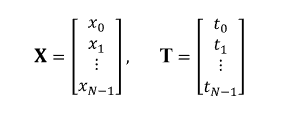

In [3]:
# X는 무게 T 성별
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
np.random.seed(0)
X_min = 0; X_max=2.5; X_n=30
X_col = ['A','B']
X = np.zeros(X_n)
T = np.zeros(X_n,dtype='int8')
Dist_s = [0.4,0.8] #데이터 분포의 시작점
Dist_w = [0.8,1.6] #데이터 분포의 폭
pi= 0.5  # 클래스가 0이될 확률
for n in range(X_n):
    wk = np.random.rand()  # 0~1사이의 임의의 실수
    T[n] = 1 if wk >= pi else 0
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
# 데이터 표시
print(f"X = {np.round(X,2)}")
print(f"T = {T}")

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [10]:
def show_data1(X,T):
  k = np.max(T) + 1
  for k in range(k):
    plt.plot(X[T==k],T[T==k],alpha=0.5,marker='o')
    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])

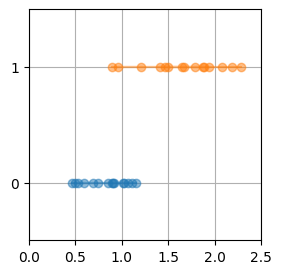

In [11]:
fig = plt.figure(figsize=(3, 3))
show_data1(X,T)
plt.show()

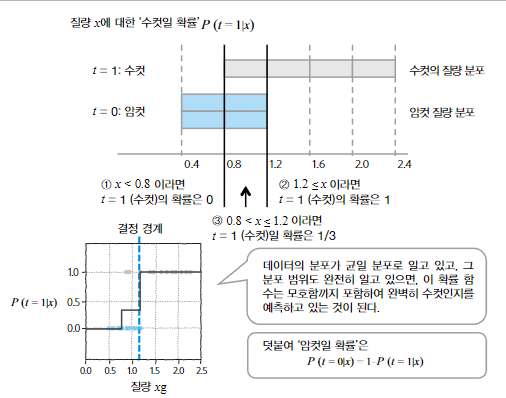

In [ ]:
# 최대 가능도법
# 0.8 < x <= 1.2  p(t=1|x) = 1/3  --> 학습이아니라 데어터 분포 정보에의해서 회득학 지식
# --> 데이터로부터 획득을 해야 한다

# 0.8 < x <= 1.2 범위에 있는 t를 구상하면 T = [0,0,0,1]  p(t=1|x) = w  가장 타당한 w를 추론하는 문제
# T=1될 확률은 1/4 --> 다른 모델에 대해서도 대응
# 클래스 T가 0 0 0 1이 생성될 확률을 가능도(우도)
# w =  0.1  w=p(t=1|x) = 0.1   t가 1이될 확률은 0.1  반대로 t가 0이될 확률은 1-0.1 = 0.9
# w = 0.1 경우 우도는 p(t=1|x) = 0.1
# 0이될 확률은 0.9  T가 0,0,0,1  0.9*0.9*0.9*0.1 = 0.0729
# w = 0.2 우도는 0.8*0.8*0.8*0.2 = 0.1024

# w가 0 ~ 1 p(t=1|x) =w  t가 1일되 확률은 w이고 t가 0이될 확률은 1-w

# 처음 3번 t=0이고 4번째가 t=1될  확률 즉 가능도(우도)
# p(T=0,0,0,1|x) = (1-w)**3*w

# 이산의 최대치를 갖는 w가 가장 적절한 값이자 추정치 최대 가능도법

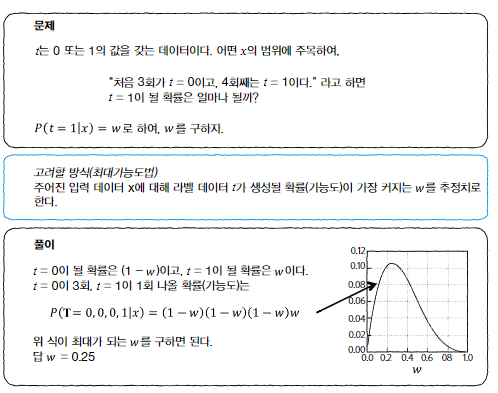

- 연속된 곱셈을 다룰때는 양변에 log를 취한다
- 곱셈이 덧셈으로 변환

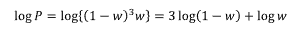

- 편미분을통해 최대값을 가지는 매개변수를 구한다.

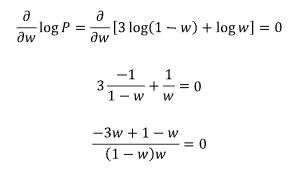

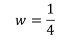

# 로지스틱 회귀

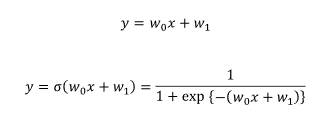

In [12]:
def logistic(x,w):
  y  = 1 / (1 + np.exp(-(w[0]*x + w[1])))
  return y

In [20]:
def show_logistic(w):
  xb = np.linspace(X_min, X_max, 100)
  y = logistic(xb,w)
  plt.plot(xb,y, color='gray', linewidth=4)
  # 결정경계
  i = np.min(np.where(y>0.5))
  B = (xb[i-1]+xb[i]) / 2
  plt.plot([B,B], [-0.5,1.5], color='k', linestyle='--'  )
  plt.grid(True)
  plt.show()

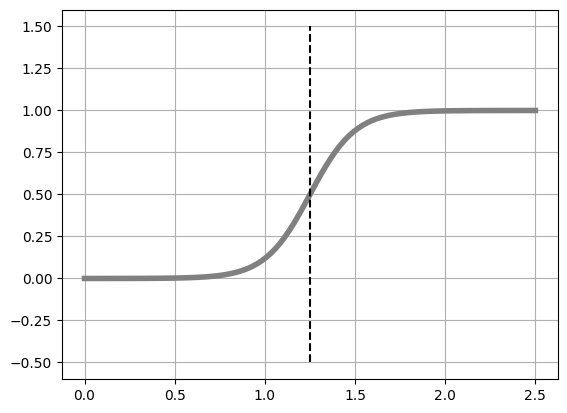

In [21]:
W = [8,-10]
show_logistic(W)

로지스틱회귀의 학습모델


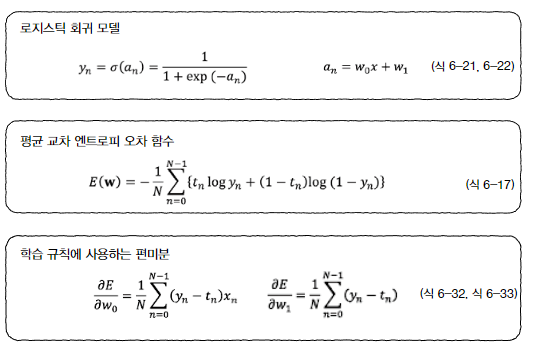

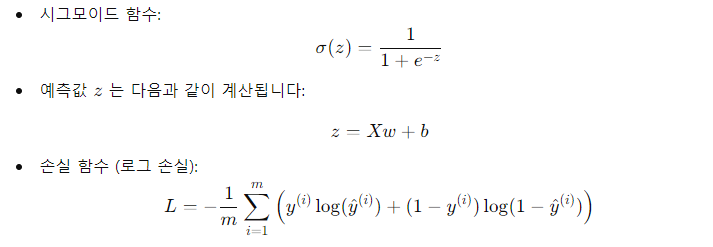

In [24]:
# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 로지스틱 회귀 클래스 정의
class LogisticRegression:
  def __init__(self, learning_rate=0.01, num_iterations=1000):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.weight = None
    self.bias = None
  # 모델 학습
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weight = np.zeros(n_samples)  # 가중치 초기화
    self.bias = 0  # 초기화

    # 경사하강법
    for _ in range(self.num_iterations):
      linear_model = np.dot(X, self.weight) + self.bias  # 전방계산 forward  예측값 Z
      predictions = sigmoid(linear_model)  # 데이터를 연속형태로 변경  -> 미분이 가능한상태 -> 기울기 구할 -> 손실함수의 최적의 해
      # 파라메터 업데이트
      dw = (1/n_samples)*np.dot(X.T, (predictions - y))  # 미분값
      db = (1/n_samples)*np.sum(predictions - y)

      self.weight -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
    def predict(self, X):
      linear_model = np.dot(X,self.weight) + self.bias
      y_predicted = sigmoid(linear_model)
      y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
      return np.array(y_predicted_cls)


In [ ]:
# 데이터
